<a href="https://colab.research.google.com/github/SaiKoushik1825/Machine-Learning/blob/main/MLlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK 2

In [1]:
#Q1
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#load data
iris=datasets.load_iris()
X=iris.data
y=iris.target
df1=pd.DataFrame(X,columns=iris.feature_names)
df1['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df1.insert(0, 'Id', range(1, len(df1) + 1))
print(X.shape)
print(X[:3])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [ ]:
#Q2
print(iris.keys())
print(iris.feature_names)
print(iris.DESCR) #or iris['DESCR']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width: 

In [ ]:
#Q3
print(df1.isnull().sum())
len(df1)

Id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


150

In [ ]:
#4)
print(df1.describe())

               Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
count  150.000000         150.000000        150.000000         150.000000   
mean    75.500000           5.843333          3.057333           3.758000   
std     43.445368           0.828066          0.435866           1.765298   
min      1.000000           4.300000          2.000000           1.000000   
25%     38.250000           5.100000          2.800000           1.600000   
50%     75.500000           5.800000          3.000000           4.350000   
75%    112.750000           6.400000          3.300000           5.100000   
max    150.000000           7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
#5)
for species in df1['Species'].unique():
    print(f"\nObservations for {species}:")
    print(df1[df1['Species'] == species].head(3))


Observations for setosa:
   Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0   1                5.1               3.5                1.4   
1   2                4.9               3.0                1.4   
2   3                4.7               3.2                1.3   

   petal width (cm) Species  
0               0.2  setosa  
1               0.2  setosa  
2               0.2  setosa  

Observations for versicolor:
    Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
50  51                7.0               3.2                4.7   
51  52                6.4               3.2                4.5   
52  53                6.9               3.1                4.9   

    petal width (cm)     Species  
50               1.4  versicolor  
51               1.5  versicolor  
52               1.5  versicolor  

Observations for virginica:
      Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
100  101                6.3               3.3                

In [ ]:
#6)
df_no_id = df1.drop(columns='Id')
print(df_no_id.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
#7)
print(df1.iloc[0:1, 0:4])

   Id  sepal length (cm)  sepal width (cm)  petal length (cm)
0   1                5.1               3.5                1.4


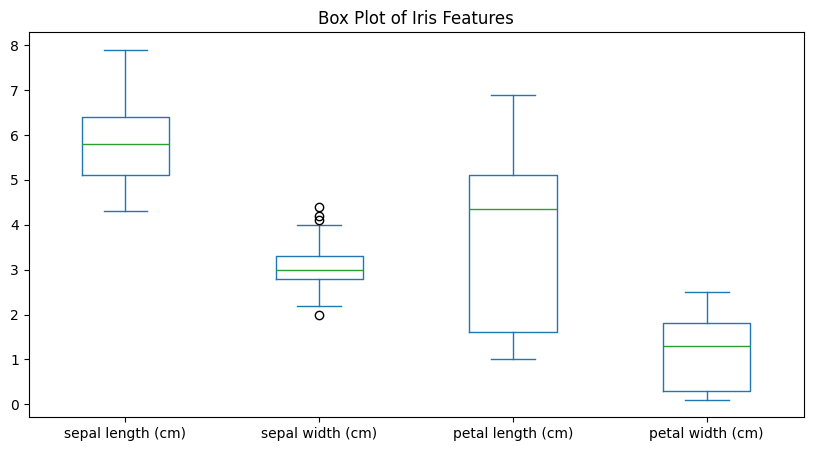

In [ ]:
#8)
df_no_id.drop(columns='Species').plot(kind='box', figsize=(10,5))
plt.title("Box Plot of Iris Features")
plt.show()

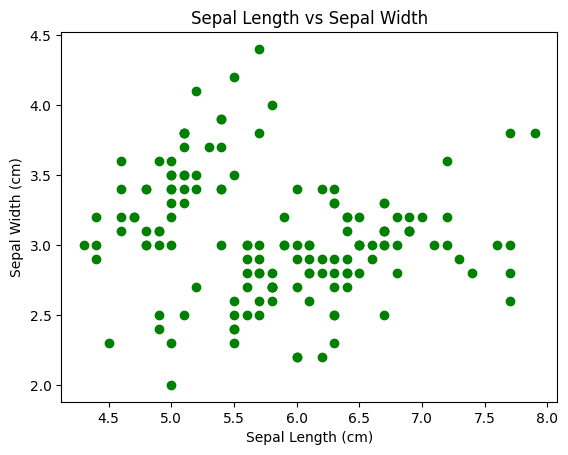

In [ ]:
#11)
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], c='green')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

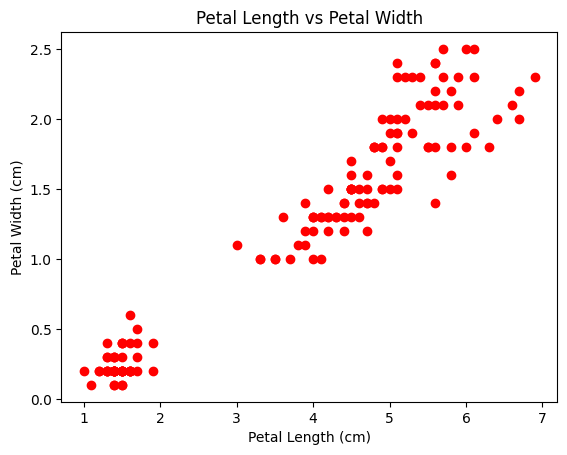

In [ ]:
#12)
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], c='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.show()


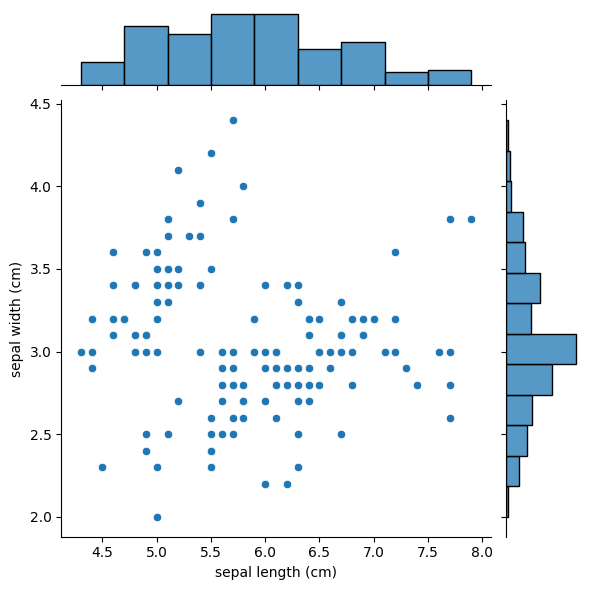

In [ ]:
#14)
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=df1, kind='scatter')
plt.show()

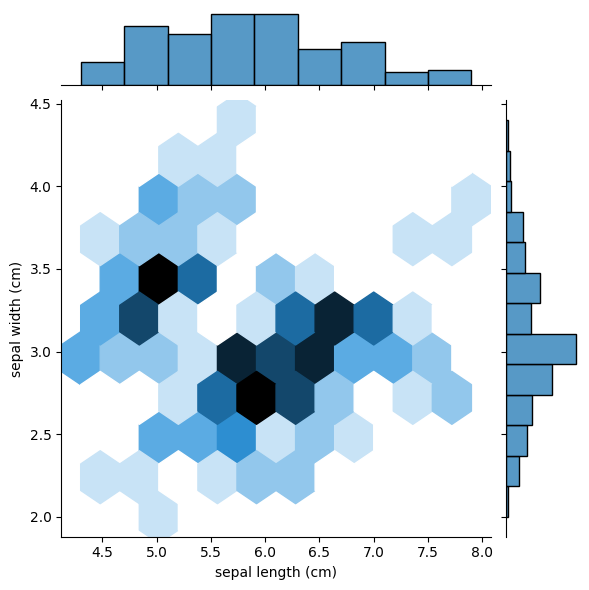

In [ ]:
#15)
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=df1, kind='hex')
plt.show()


In [ ]:
#20)
X = df1.iloc[:, 0:4]
y = df1['Species']
print("Attributes (X):\n", X.head())
print("\nLabels (y):\n", y.head())

Attributes (X):
    Id  sepal length (cm)  sepal width (cm)  petal length (cm)
0   1                5.1               3.5                1.4
1   2                4.9               3.0                1.4
2   3                4.7               3.2                1.3
3   4                4.6               3.1                1.5
4   5                5.0               3.6                1.4

Labels (y):
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [ ]:
#21)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\n=== Training Data (first 5) ===\n", X_train.head())
print("\n=== Test Data (first 5) ===\n", X_test.head())


X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)

=== Training Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
81    82                5.5               2.4                3.7
133  134                6.3               2.8                5.1
137  138                6.4               3.1                5.5
75    76                6.6               3.0                4.4
109  110                7.2               3.6                6.1

=== Test Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
73    74                6.1               2.8                4.7
18    19                5.7               3.8                1.7
118  119                7.7               2.6                6.9
78    79                6.0               2.9                4.5
76    77                6.8               2.8                4.8


In [ ]:
#22)
df1['Species_Code'] = df1['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
print(df1[['Species', 'Species_Code']].head())
X = df1.iloc[:, 0:4]
y = df1['Species_Code']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("\n=== Training Data (first 5) ===\n", X_train.head())
print("\n=== Test Data (first 5) ===\n", X_test.head())

  Species Species_Code
0  setosa            0
1  setosa            0
2  setosa            0
3  setosa            0
4  setosa            0
Train shape: (120, 4) (120,)
Test shape: (30, 4) (30,)

=== Training Data (first 5) ===
     Id  sepal length (cm)  sepal width (cm)  petal length (cm)
22  23                4.6               3.6                1.0
15  16                5.7               4.4                1.5
65  66                6.7               3.1                4.4
11  12                4.8               3.4                1.6
42  43                4.4               3.2                1.3

=== Test Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
73    74                6.1               2.8                4.7
18    19                5.7               3.8                1.7
118  119                7.7               2.6                6.9
78    79                6.0               2.9                4.5
76    77                6.8             

WEEK 3(1/8/25)

In [ ]:
df=pd.read_csv("diabetes.csv")

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns="Outcome"),df["Outcome"],test_size=0.4,random_state=42)
constant_features=[features for features in X_train.columns if X_train[features].std()==0]
len(constant_features)

0

In [ ]:
#Quasi constant
quasi_constant_feat=[]
for feature in X_train.columns:
  predominant=(X_train[feature].value_counts()/float(len(X_train))).sort_values(ascending=False).values[0]
  if predominant>=0.998:
    quasi_constant_feat.append(feature)
len(quasi_constant_feat)

0

<Axes: >

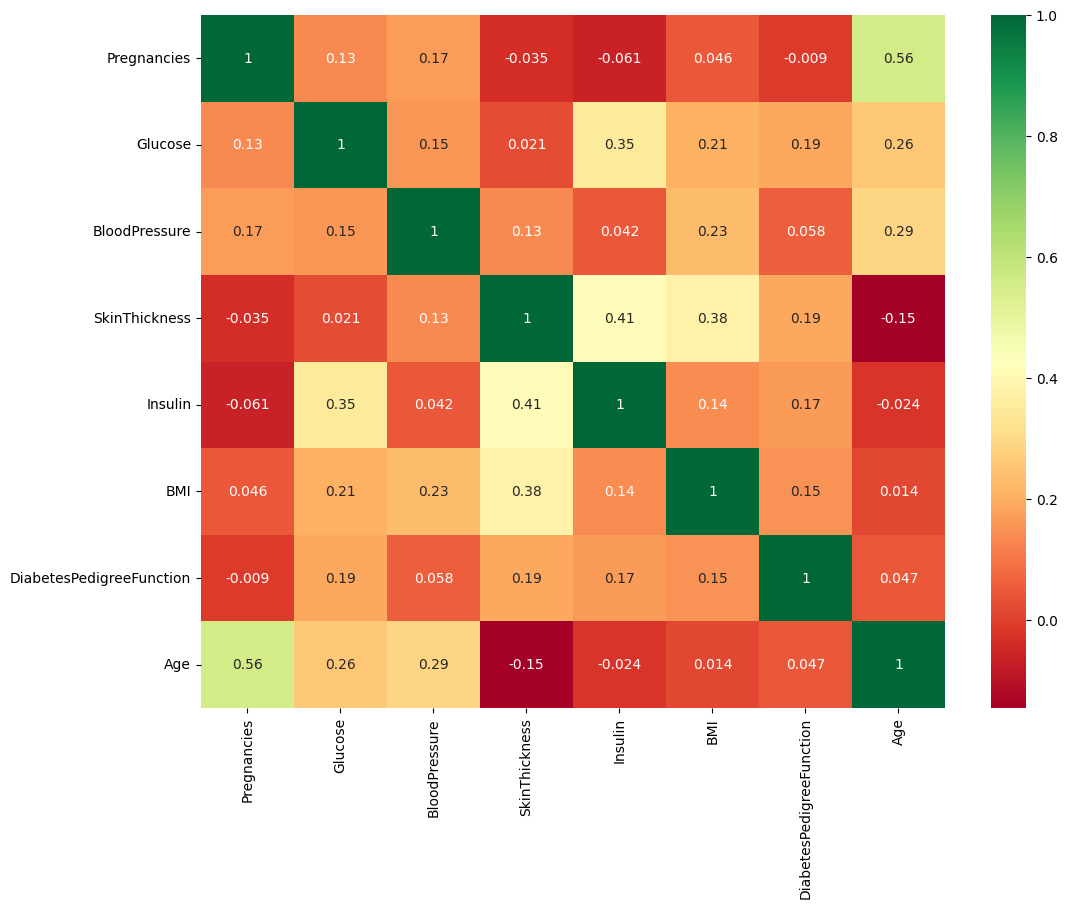

In [ ]:
corrmat=X_train.corr()
fig, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")



set() 
correlated_features: 0
(537, 8) (231, 8)




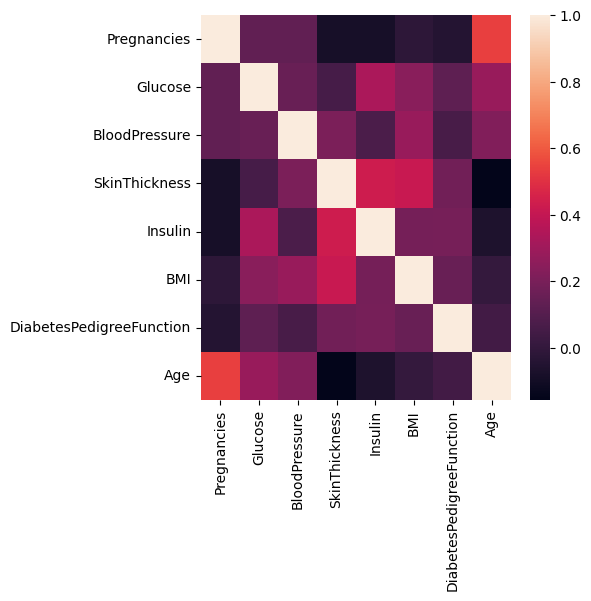

In [ ]:
#correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv("diabetes.csv")
df.shape
df.head()
[col for col in df.columns if df[col].isnull().sum()>0]

X_train,X_test,y_train,y_test=train_test_split(
    df.drop(labels=['Outcome'],axis=1),
    df['Outcome'],
    test_size=0.3,
    random_state=0
)

# Select only numeric columns for correlation calculation
X_train_numeric = X_train.select_dtypes(include=np.number)

corrmat = X_train_numeric.corr()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.heatmap(corrmat)

print('\n')

group_feature_ls = []
correlation_group = []

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# Calculate correlated features on the numeric subset
corr_features = correlation(X_train_numeric, 0.9)
correlated_features = set(corr_features)
print(correlated_features, "\ncorrelated_features:", len(correlated_features))

# Drop correlated features from the original X_train and X_test
X_train.drop(labels = correlated_features, axis = 1, inplace=True)
X_test.drop(labels = correlated_features, axis = 1, inplace=True)
print(X_train.shape, X_test.shape)

print('\n')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Non-numeric columns: Index([], dtype='object')


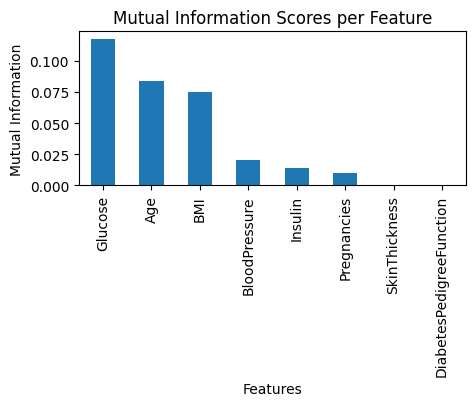

Top 20 features based on Mutual Information:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object') 
Mutual Information: 20
(537, 8) (231, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [ ]:
#mutal information
from sklearn.feature_selection import mutual_info_classif, SelectKBest, mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv("diabetes.csv")
df.shape
df.head()
[col for col in df.columns if df[col].isnull().sum()>0]

X_train,X_test,y_train,y_test=train_test_split(
    df.drop(labels=['Outcome'],axis=1),
    df['Outcome'],
    test_size=0.3,
    random_state=0
)


X_train_filled = X_train.fillna(0)

# Identify non-numeric columns
non_numeric_cols = X_train_filled.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_cols)

# Handle non-numeric columns (example: dropping them for simplicity)
X_train_filled_numeric = X_train_filled.drop(columns=non_numeric_cols)


mi = mutual_info_regression(X_train_filled_numeric, y_train)

mi_series = pd.Series(mi)
mi_series.index = X_train_filled_numeric.columns

mi_sorted = mi_series.sort_values(ascending=False)

plt.figure(figsize=(5, 2)) # Reduced figure size
mi_sorted.plot.bar()
plt.title("Mutual Information Scores per Feature")
plt.ylabel("Mutual Information")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_regression, k=20)
selector.fit(X_train_filled_numeric, y_train)

top_mi_features = X_train_filled_numeric.columns[selector.get_support()]
print("Top 20 features based on Mutual Information:\n", top_mi_features, "\nMutual Information: 20")

X_train = X_train[top_mi_features]
X_test = X_test[top_mi_features]
print(X_train.shape, X_test.shape)

WEEK_4(8/8/25)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df4=pd.read_csv("/content/drive/MyDrive/ML/Copy of titanic_train.csv")
titanic_df_test=pd.read_csv("/content/drive/MyDrive/ML/Copy of titanic_test.csv")
print(df4.sample(5))

     PassengerId  Survived  Pclass  \
679          680         1       1   
271          272         1       3   
10            11         1       3   
319          320         1       1   
205          206         0       3   

                                                  Name     Sex   Age  SibSp  \
679                 Cardeza, Mr. Thomas Drake Martinez    male  36.0      0   
271                       Tornquist, Mr. William Henry    male  25.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
319  Spedden, Mrs. Frederic Oakley (Margaretta Corn...  female  40.0      1   
205                         Strom, Miss. Telma Matilda  female   2.0      0   

     Parch    Ticket      Fare        Cabin Embarked  
679      1  PC 17755  512.3292  B51 B53 B55        C  
271      0      LINE    0.0000          NaN        S  
10       1   PP 9549   16.7000           G6        S  
319      1     16966  134.5000          E34        C  
205      1    347054 

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = df4['Survived']

X = df4.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col].astype(str))

print("Features after encoding:\n", X.head())
print("Target:\n", y.head())

Features after encoding:
    PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    1  22.0      1      0   7.2500         2
1            2       1    0  38.0      1      0  71.2833         0
2            3       3    0  26.0      0      0   7.9250         2
3            4       1    0  35.0      1      0  53.1000         2
4            5       3    1  35.0      0      0   8.0500         2
Target:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
# Constant Features
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)
constant_features = [col for col in X.columns if col not in X.columns[constant_filter.get_support()]]
print("\nConstant Features:", constant_features)


Constant Features: []


In [ ]:
#Quasi-constant Features
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X)
quasi_constant_features = [col for col in X.columns if col not in X.columns[quasi_constant_filter.get_support()]]
print("Quasi-Constant Features:", quasi_constant_features)

Quasi-Constant Features: []


In [ ]:
# Duplicate Features
duplicate_features = []
X_T = X.T
for i in range(len(X_T)):
    for j in range(i+1, len(X_T)):
        if X_T.iloc[i].equals(X_T.iloc[j]):
            duplicate_features.append(X_T.index[j])
print("Duplicate Features:", duplicate_features)


Duplicate Features: []


In [ ]:
corr_matrix = X.corr()
print(corr_matrix)

             PassengerId    Pclass       Sex       Age     SibSp     Parch  \
PassengerId     1.000000 -0.035144  0.042939  0.036847 -0.057527 -0.001652   
Pclass         -0.035144  1.000000  0.131900 -0.369226  0.083081  0.018443   
Sex             0.042939  0.131900  1.000000  0.093254 -0.114631 -0.245489   
Age             0.036847 -0.369226  0.093254  1.000000 -0.308247 -0.189119   
SibSp          -0.057527  0.083081 -0.114631 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.018443 -0.245489 -0.189119  0.414838  1.000000   
Fare            0.012658 -0.549500 -0.182333  0.096067  0.159651  0.216225   
Embarked        0.013083  0.157112  0.104057 -0.025252  0.066654  0.038322   

                 Fare  Embarked  
PassengerId  0.012658  0.013083  
Pclass      -0.549500  0.157112  
Sex         -0.182333  0.104057  
Age          0.096067 -0.025252  
SibSp        0.159651  0.066654  
Parch        0.216225  0.038322  
Fare         1.000000 -0.221226  
Embarked    -0.221226  1.

In [ ]:
# Handle missing values
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col].fillna(X[col].median(), inplace=True)
    else:
        X[col].fillna(X[col].mode()[0], inplace=True)

/tmp/ipython-input-134038499.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


Non-numeric columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
mutal_information Survived       0.698641
Fare           0.125314
SibSp          0.091313
Age            0.055583
Pclass         0.015260
PassengerId    0.012669
Parch          0.000000
dtype: float64


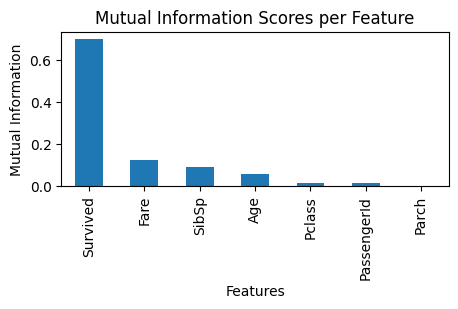

In [ ]:
#mutal information
from sklearn.feature_selection import mutual_info_classif, SelectKBest, mutual_info_regression
X_train_filled = df4.fillna(0)

non_numeric_cols = X_train_filled.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_cols)

X_train_filled_numeric = X_train_filled.drop(columns=non_numeric_cols)


mi = mutual_info_regression(X_train_filled_numeric, df4["Survived"])

mi_series = pd.Series(mi)
mi_series.index = X_train_filled_numeric.columns

mi_sorted = mi_series.sort_values(ascending=False)
print("mutal_information",mi_sorted)
plt.figure(figsize=(5, 2))
mi_sorted.plot.bar()
plt.title("Mutual Information Scores per Feature")
plt.ylabel("Mutual Information")
plt.xlabel("Features")
plt.show()


In [ ]:
#chi-2
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df4['Sex'], df4['Survived'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic = {chi2}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p}")
print("Expected frequencies:\n", expected)
alpha = 0.05
if p < alpha:
    print("\nConclusion: Reject the null hypothesis — 'Sex' and 'Survived' are dependent.")
else:
    print("\nConclusion: Fail to reject the null hypothesis — 'Sex' and 'Survived' are independent.")

Survived    0    1
Sex               
female     81  233
male      468  109
Chi-square statistic = 260.71702016732104
Degrees of freedom = 1
P-value = 1.1973570627755645e-58
Expected frequencies:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]

Conclusion: Reject the null hypothesis — 'Sex' and 'Survived' are dependent.


In [ ]:
#anova
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv("/content/drive/MyDrive/ML/Copy of titanic_train.csv")

# Drop rows with missing Age values
df = df.dropna(subset=['Age'])

# Group ages by Pclass
group1 = df[df['Pclass'] == 1]['Age']
group2 = df[df['Pclass'] == 2]['Age']
group3 = df[df['Pclass'] == 3]['Age']


f_stat, p_val = f_oneway(group1, group2, group3)

print("F-statistic:", f_stat)
print("P-value:", p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("\nConclusion: Reject the null hypothesis — at least one group mean is significantly different.")
else:
    print("\nConclusion: Fail to reject the null hypothesis — all group means are statistically similar.")


F-statistic: 57.44348434067624
P-value: 7.487984171959213e-24

Conclusion: Reject the null hypothesis — at least one group mean is significantly different.


In [ ]:
# Univariate ROC-AUC
from sklearn.metrics import roc_auc_score
roc_scores = {}
for col in X.columns:
    try:
        roc_scores[col] = roc_auc_score(y, X[col])
    except:
        roc_scores[col] = None
print("\nROC-AUC Scores:\n", pd.Series(roc_scores).sort_values(ascending=False))


ROC-AUC Scores:
 Fare           0.692122
Parch          0.561217
SibSp          0.543162
PassengerId    0.497028
Age            0.478166
Embarked       0.427913
Pclass         0.318583
Sex            0.233127
dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

model = LogisticRegression(max_iter=2000)

In [ ]:
# Forward Selection
sfs_forward = SFS(model, k_features='best', forward=True, scoring='accuracy', cv=5)
sfs_forward = sfs_forward.fit(X, y)
print("\nForward Selection Features:", list(sfs_forward.k_feature_names_))


Forward Selection Features: ['PassengerId', 'Pclass', 'Sex', 'SibSp']


In [ ]:
# Backward Selection
sfs_backward = SFS(model, k_features='best', forward=False, scoring='accuracy', cv=5)
sfs_backward = sfs_backward.fit(X, y)
print("Backward Selection Features:", list(sfs_backward.k_feature_names_))

Backward Selection Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']


In [ ]:
# Exhaustive Search
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs = EFS(model, min_features=1, max_features=4, scoring='accuracy', cv=5)
efs = efs.fit(X, y)
print("Exhaustive Search Best Features:", list(X.columns[list(efs.best_idx_)]))

Features: 162/162

Exhaustive Search Best Features: ['PassengerId', 'Pclass', 'Sex', 'SibSp']


In [ ]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=3)
rfe.fit(X, y)
print("RFE Selected Features:", X.columns[rfe.support_])
print("RFE Ranking:", rfe.ranking_)

RFE Selected Features: Index(['Pclass', 'Sex', 'Embarked'], dtype='object')
RFE Ranking: [6 1 1 4 2 3 5 1]


In [ ]:
#Dataset2
import pandas as pd
from google.colab import drive
df5=pd.read_csv('/content/drive/MyDrive/ML/Copy of house_price_train.csv')
print(df5.sample(10))

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
281    282          20       FV         60.0     7200   Pave  Pave      Reg   
1075  1076          70       RL         75.0    13125   Pave   NaN      Reg   
975    976         160       FV          NaN     2651   Pave   NaN      Reg   
126    127         120       RL          NaN     4928   Pave   NaN      IR1   
793    794          20       RL         76.0     9158   Pave   NaN      Reg   
1399  1400          50       RL         51.0     6171   Pave   NaN      Reg   
277    278          20       RL        140.0    19138   Pave   NaN      Reg   
837    838         160       RM         21.0     1680   Pave   NaN      Reg   
641    642          60       FV          NaN     7050   Pave   NaN      Reg   
402    403          30       RL         60.0    10200   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
281          Lvl    AllPub  ...        0    NaN    N

In [ ]:
X = df5.drop(columns=['SalePrice'])  # features
y = df5['SalePrice']                 # target


In [ ]:
for col in X.select_dtypes(include=['number']).columns:
    X[col] = X[col].fillna(X[col].mean())

for col in X.select_dtypes(exclude=['number']).columns:
    X[col] = X[col].fillna(X[col].mode()[0])


In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1460, 80)
y shape: (1460,)


In [ ]:
#Constant feature
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)
constant_features = [column for column in X.columns if column not in X.columns[constant_filter.get_support()]]
print("Constant Features:", constant_features)

Constant Features: []


In [ ]:
#Quasi Constant feature
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X)
quasi_constant_features = [column for column in X.columns if column not in X.columns[quasi_constant_filter.get_support()]]
print("Quasi-constant Features:", quasi_constant_features)

Quasi-constant Features: ['Street', 'Utilities', 'PoolQC', 'MiscFeature']


In [ ]:
#Duplicate Feature
duplicate_features = []
for col in X.columns:
    if any(X[col].equals(X[dup]) for dup in duplicate_features):
        continue
    duplicates = [dup for dup in X.columns if X[col].equals(X[dup]) and col != dup]
    duplicate_features.extend(duplicates)

print("Duplicate Features:", duplicate_features)

Duplicate Features: []


In [ ]:
corr_matrix = X.corr()
high_corr = [(col, corr_matrix[col].nlargest(2).iloc[1]) for col in corr_matrix.columns]
print("Correlation with other features:", high_corr[:10])  # show first 10

Correlation with other features: [('Id', np.float64(0.057043904789252316)), ('MSSubClass', np.float64(0.7460629359877902)), ('MSZoning', np.float64(0.20053624461466388)), ('LotFrontage', np.float64(0.4142663943689002)), ('LotArea', np.float64(0.43686801153335103)), ('Street', np.float64(0.11599517234685623)), ('Alley', np.float64(0.18613833409814423)), ('LotShape', np.float64(0.231392143466422)), ('LandContour', np.float64(0.161622387559156)), ('Utilities', np.float64(0.1033804742696871))]


In [ ]:
# Handle missing values
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col].fillna(X[col].median(), inplace=True)
    else:
        X[col].fillna(X[col].mode()[0], inplace=True)

/tmp/ipython-input-134038499.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


In [ ]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X, y)
print("Mutual Information (Regression):\n", pd.Series(mi_scores, index=X.columns).sort_values(ascending=False))

Mutual Information (Regression):
 OverallQual     0.565664
Neighborhood    0.506667
GrLivArea       0.483479
GarageCars      0.378413
TotalBsmtSF     0.367678
                  ...   
BsmtFinSF2      0.000000
LowQualFinSF    0.000000
3SsnPorch       0.000000
MiscFeature     0.000000
MoSold          0.000000
Length: 80, dtype: float64


In [ ]:
y_class = pd.qcut(y, q=4, labels=False)

from sklearn.feature_selection import chi2
chi_scores, p_values = chi2(X, y_class)
print("Chi-Square Scores:\n", pd.Series(chi_scores, index=X.columns).sort_values(ascending=False))


Chi-Square Scores:
 LotArea        915890.790089
GrLivArea      114839.800812
2ndFlrSF        84193.212229
TotalBsmtSF     80721.947957
BsmtFinSF1      73377.041047
                   ...      
Street              0.024775
PoolQC              0.023616
MiscFeature         0.011936
Condition2          0.002704
YrSold              0.001469
Length: 80, dtype: float64


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Top 10 features (ANOVA Regression):", selected_features.tolist())

Top 10 features (ANOVA Regression): ['OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea']


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import numpy as np

y_bin = label_binarize(y_class, classes=[0,1,2,3])

roc_auc_scores = {}
for col in X.columns:
    scores = X[col].values
    aucs = []
    for i in range(y_bin.shape[1]):
        try:
            auc = roc_auc_score(y_bin[:, i], scores)
            aucs.append(auc)
        except ValueError:
            continue
    roc_auc_scores[col] = np.mean(aucs) if aucs else np.nan

roc_auc_scores_sorted = sorted(roc_auc_scores.items(), key=lambda x: x[1], reverse=True)
print("Top 10 features by univariate ROC-AUC (multiclass, ovr):")
for feature, score in roc_auc_scores_sorted[:10]:
    print(f"{feature}: {score:.4f}")


Top 10 features by univariate ROC-AUC (multiclass, ovr):
OverallQual: 0.5007
GrLivArea: 0.5006
GarageArea: 0.5005
TotalBsmtSF: 0.5005
1stFlrSF: 0.5005
GarageCars: 0.5005
GarageYrBlt: 0.5005
TotRmsAbvGrd: 0.5005
YearBuilt: 0.5005
FullBath: 0.5004


In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

model = LogisticRegression(max_iter=2000)


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
sfs_forward = SFS(lr, k_features=5, forward=True, scoring='r2', cv=3)
sfs_forward = sfs_forward.fit(X, y)
print("Forward Selection Features:", list(sfs_forward.k_feature_names_))


Forward Selection Features: ['MSSubClass', 'OverallQual', 'BsmtQual', 'GrLivArea', 'BsmtFullBath']


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

corr_scores = X.corrwith(y).abs().sort_values(ascending=False)
top_features = corr_scores.head(8).index
X_reduced = X[top_features]

lr = LinearRegression()

efs = EFS(estimator=lr,
          min_features=3,
          max_features=5,
          scoring='r2',
          cv=3,
          n_jobs=-1)
efs = efs.fit(X_reduced, y)
print("Best Features (Exhaustive Search on reduced features):", list(efs.best_feature_names_))


Features: 182/182

Best Features (Exhaustive Search on reduced features): ['OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'BsmtQual']


In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X, y)
print("RFE Selected Features:", X.columns[rfe.support_].tolist())


RFE Selected Features: ['Street', 'Utilities', 'LandSlope', 'OverallQual', 'PoolQC']


WEEK-5

In [6]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv('/content/drive/MyDrive/ML/Copy of house_price_train.csv')
print(df.sample(5))

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
364    365          60       RL          NaN    18800   Pave   NaN      IR1   
286    287          50       RL         77.0     9786   Pave   NaN      IR1   
1015  1016          60       RL         70.0     8400   Pave   NaN      Reg   
784    785          75       RM         35.0     6300   Pave  Grvl      Reg   
782    783          20       RL         67.0    16285   Pave   NaN      IR2   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
364          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
286          Bnk    AllPub  ...        0    NaN  GdPrv         NaN       0   
1015         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
784          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
782          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  

In [ ]:
print(df.shape)
print(df.info())
print(df.describe())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [ ]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


In [ ]:
target = "SalePrice"
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric = df_numeric.dropna(axis=1)
X = df_numeric.drop(target, axis=1)
y = df_numeric[target]

print("Final features used:", X.shape[1])

Final features used: 34


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Dataset 2
import pandas as pd
from google.colab import drive
df2=pd.read_csv('diabetes.csv')
print(df2.sample(5))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
329            6      105             70             32       68  30.8   
282            7      133             88             15      155  32.4   
578           10      133             68              0        0  27.0   
300            0      167              0              0        0  32.3   
488            4       99             72             17        0  25.6   

     DiabetesPedigreeFunction  Age  Outcome  
329                     0.122   37        0  
282                     0.262   37        0  
578                     0.245   36        0  
300                     0.839   30        1  
488                     0.294   28        0  


In [ ]:
print(df2.shape)
print(df2.info())
print(df2.describe())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479  

In [ ]:
print(df2.isnull().sum().sort_values(ascending=False).head(10))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
target = "Outcome"

df_numeric = df2.select_dtypes(include=['int64', 'float64'])
df_numeric = df_numeric.dropna(axis=1)

In [ ]:
X = df_numeric.drop(target, axis=1)
y = df_numeric[target]

print("Final features used:", X.shape[1])

Final features used: 8


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Squared Error: 0.17104527280850104
Root Mean Squared Error: 0.4135761995189049
R² Score: 0.25500281176741757


In [ ]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients.head(10))
print(coefficients.tail(10))

                    Feature  Coefficient
6  DiabetesPedigreeFunction     0.111263
5                       BMI     0.015039
0               Pregnancies     0.010468
7                       Age     0.006460
1                   Glucose     0.005634
3             SkinThickness     0.000532
4                   Insulin    -0.000278
2             BloodPressure    -0.002281
                    Feature  Coefficient
6  DiabetesPedigreeFunction     0.111263
5                       BMI     0.015039
0               Pregnancies     0.010468
7                       Age     0.006460
1                   Glucose     0.005634
3             SkinThickness     0.000532
4                   Insulin    -0.000278
2             BloodPressure    -0.002281


In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" Multilinear Regression Results:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

 Multilinear Regression Results:
Mean Squared Error: 0.17104527280850104
Root Mean Squared Error: 0.4135761995189049
R² Score: 0.25500281176741757


In [ ]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": mlr.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nTop Positive Impact Features:\n", coeff_df.head(10))
print("\nTop Negative Impact Features:\n", coeff_df.tail(10))


Top Positive Impact Features:
                     Feature  Coefficient
6  DiabetesPedigreeFunction     0.111263
5                       BMI     0.015039
0               Pregnancies     0.010468
7                       Age     0.006460
1                   Glucose     0.005634
3             SkinThickness     0.000532
4                   Insulin    -0.000278
2             BloodPressure    -0.002281

Top Negative Impact Features:
                     Feature  Coefficient
6  DiabetesPedigreeFunction     0.111263
5                       BMI     0.015039
0               Pregnancies     0.010468
7                       Age     0.006460
1                   Glucose     0.005634
3             SkinThickness     0.000532
4                   Insulin    -0.000278
2             BloodPressure    -0.002281


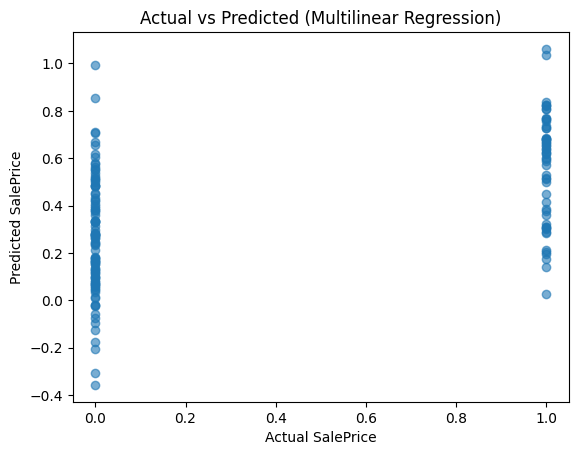

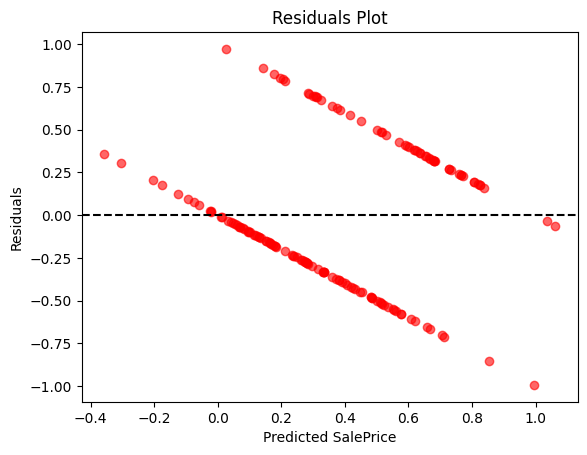

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted (Multilinear Regression)")
plt.show()

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

In [ ]:
from google.colab import drive
df=pd.read_csv('diabetes.csv')
print(df.sample(3))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
568            4      154             72             29      126  31.3   
494            3       80              0              0        0   0.0   
507            1      130             60             23      170  28.6   

     DiabetesPedigreeFunction  Age  Outcome  
568                     0.338   37        0  
494                     0.174   22        0  
507                     0.692   21        0  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#1. LASSO (L1)
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

#2. Ridge (L2)
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

#3. Elastic Net (L1 + L2)
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

#Evaluation
def evaluate(model_name, y_true, y_pred):
    print(f"{model_name}:")
    print("  MSE:", mean_squared_error(y_true, y_pred))
    print("  R2 Score:", r2_score(y_true, y_pred))
    print("---------------------------")

evaluate("LASSO (L1)", y_test, y_pred_lasso)
evaluate("Ridge (L2)", y_test, y_pred_ridge)
evaluate("Elastic Net (L1+L2)", y_test, y_pred_elastic)

print("Lasso Coefficients:", lasso.coef_)
print("Ridge Coefficients:", ridge.coef_)
print("Elastic Net Coefficients:", elastic.coef_)

LASSO (L1):
  MSE: 0.17554411608107143
  R2 Score: 0.2354078499579998
---------------------------
Ridge (L2):
  MSE: 0.17110527901659897
  R2 Score: 0.25474145139436866
---------------------------
Elastic Net (L1+L2):
  MSE: 0.1732329206857873
  R2 Score: 0.24547438990190407
---------------------------
Lasso Coefficients: [ 0.00896984  0.00573849 -0.00223618  0.00076435 -0.00026095  0.01507701
  0.01814603  0.00663569]
Ridge Coefficients: [ 0.01045897  0.00563545 -0.00228148  0.00053711 -0.00027789  0.01504193
  0.10959499  0.00646247]
Elastic Net Coefficients: [ 0.00970199  0.00568942 -0.00225911  0.00065696 -0.00026912  0.01506271
  0.06181749  0.00655169]


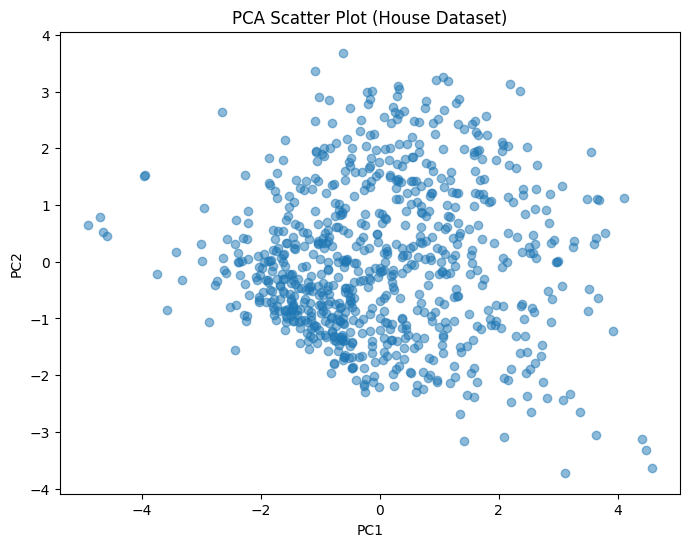

Top variables for PC1:
Glucose          0.436757
Outcome          0.415653
BMI              0.397342
Insulin          0.336332
SkinThickness    0.307292
Name: PC1, dtype: float64
Top variables for PC2:
Age              0.533202
Pregnancies      0.527446
SkinThickness    0.448398
Insulin          0.355346
BMI              0.210316
Name: PC2, dtype: float64
Variance explained by PC1: 0.261389065194386
Variance explained by PC2: 0.197145781544688
Total variance (PC1+PC2): 0.45853484673907396
Number of PCs explaining >80% variance: 6


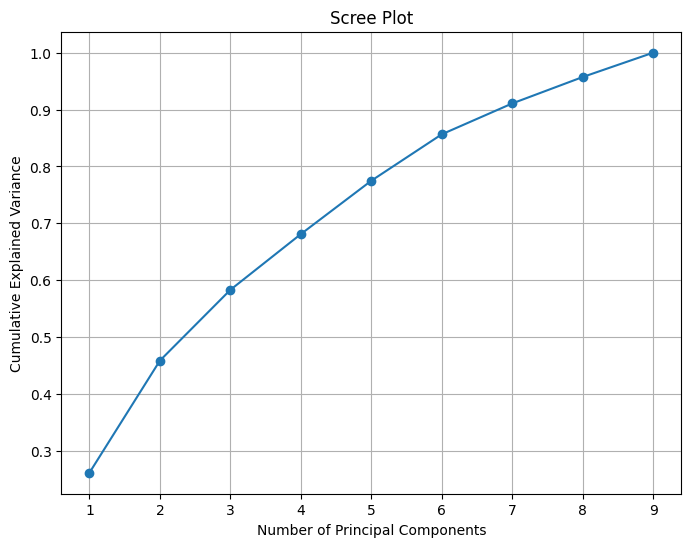

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.select_dtypes(include=[np.number]).dropna(axis=1)

#(a) Standardize the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#(b) Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scatter plot using first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot (House Dataset)")
plt.show()

#(c) Variables most important for PC1 and PC2
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(X.columns))], index=X.columns)
print("Top variables for PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head())

print("Top variables for PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head())

#(d) Percentage of variance explained by PC1 & PC2
explained_var = pca.explained_variance_ratio_
print("Variance explained by PC1:", explained_var[0])
print("Variance explained by PC2:", explained_var[1])
print("Total variance (PC1+PC2):", explained_var[0] + explained_var[1])

#(e) Number of PCs to explain >80% variance
cumulative_var = np.cumsum(explained_var)
n_pcs = np.argmax(cumulative_var >= 0.80) + 1
print("Number of PCs explaining >80% variance:", n_pcs)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()

WEEK-6(29/08/25)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

df6=pd.read_csv("/content/drive/MyDrive/ML/diabetes_DT.csv")
print(df6.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [28]:
# Features and target
X = df6.drop("Outcome", axis=1)
y = df6["Outcome"]

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
# Train Decision Tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

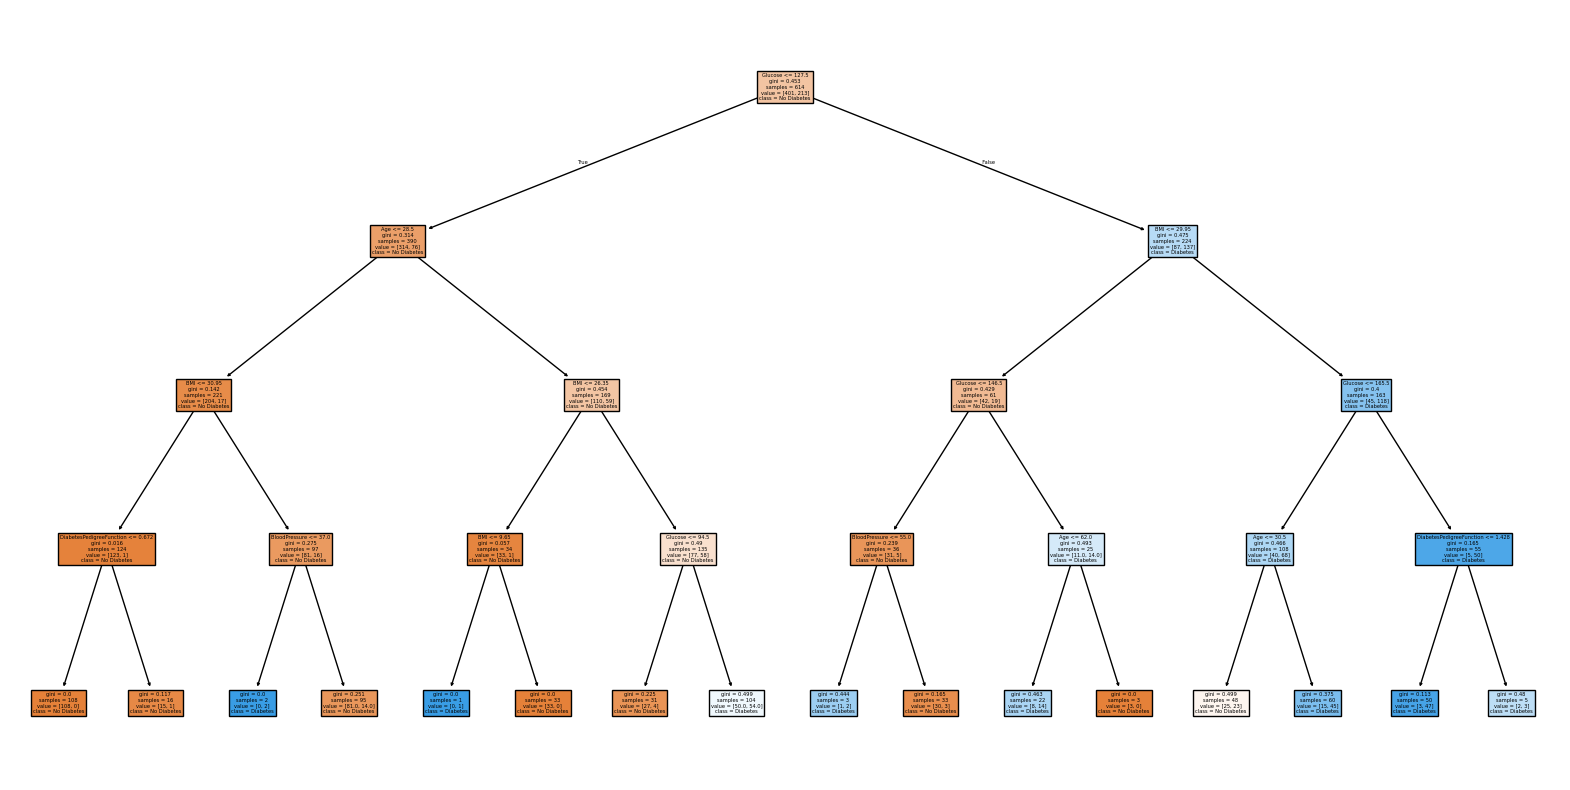

In [31]:
# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
)
plt.show()

In [32]:
# Print decision rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 94.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  94.50
|   |   |   |   |--- class: 1
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- Glucose <= 146.50
|   |   |   |--- BloodPressure <= 55.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  55.00
|   |   |   |   |--- class: 0
|   |   |--- Glucose >  146.50
|   |   |   |--- Age <= 62.00
|   | 

In [60]:
##Loan dataset
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Load dataset
dfl = pd.read_csv("/content/drive/MyDrive/ML/Loan_Default.csv")

# Show dataset info
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (148670, 34)
      ID  year  loan_limit  Gender  approv_in_adv  loan_type  loan_purpose  \
0  24890  2019           0       3              0          0             0   
1  24891  2019           0       2              0          1             0   
2  24892  2019           0       2              1          0             0   
3  24893  2019           0       2              0          0             3   
4  24894  2019           0       1              1          0             0   

   Credit_Worthiness  open_credit  business_or_commercial  ...  credit_type  \
0                  0            0                       1  ...            3   
1                  0            0                       0  ...            2   
2                  0            0                       1  ...            3   
3                  0            0                       1  ...            3   
4                  0            0                       1  ...            1   

   Credit_Score  co-applican

In [62]:
# Encode categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [63]:
# Check columns after encoding
print("\nColumns after encoding:\n", df.dtypes)


Columns after encoding:
 ID                             int64
year                           int64
loan_limit                     int64
Gender                         int64
approv_in_adv                  int64
loan_type                      int64
loan_purpose                   int64
Credit_Worthiness              int64
open_credit                    int64
business_or_commercial         int64
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization              int64
interest_only                  int64
lump_sum_payment               int64
property_value               float64
construction_type              int64
occupancy_type                 int64
Secured_by                     int64
total_units                    int64
income                       float64
credit_type                    int64
Credit_Score                   int64
co-applicant

In [70]:
# Features (X) and Target (y)
# Make sure the target column name matches your dataset
X = df.drop("Status", axis=1)
y = df["Status"]

In [71]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle missing values in training and testing data
for col in X_train.columns:
    if X_train[col].dtype in ['float64', 'int64']:
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True) # Fill missing values in test set with median from training set
    else:
        mode_val = X_train[col].mode()[0]
        X_train[col].fillna(mode_val, inplace=True)
        X_test[col].fillna(mode_val, inplace=True) # Fill missing values in test set with mode from training set


# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

/tmp/ipython-input-1497033576.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
/tmp/ipython-input-1497033576.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

GaussianNB()

Accuracy: 0.9158539046209726

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     22494
           1       0.75      0.99      0.85      7240

    accuracy                           0.92     29734
   macro avg       0.87      0.94      0.90     29734
weighted avg       0.94      0.92      0.92     29734


Confusion Matrix:
 [[20065  2429]
 [   73  7167]]


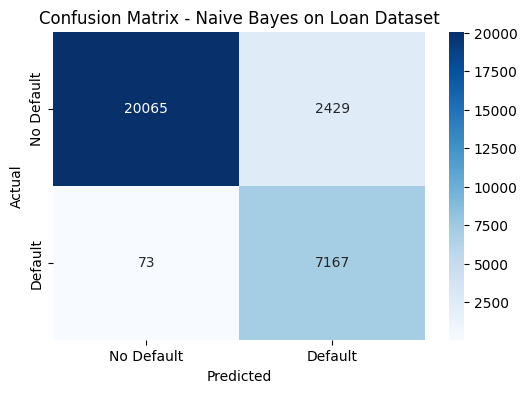

In [72]:
# Predictions
y_pred = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes on Loan Dataset")
plt.show()


In [95]:
## Svc on breast cancer
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# Load dataset
dfc = pd.read_csv("/content/drive/MyDrive/ML/Breast_Cancer.csv")

In [97]:
# Show dataset structure
print("Columns:", dfc.columns)
print(dfc.head())

Columns: Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')
   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Reg

In [98]:
# Encode categorical target column ("status")
le = LabelEncoder()
dfc["Status"] = le.fit_transform(dfc["Status"])
# "negative" -> 0, "positive" -> 1

In [99]:
# Define features (X) and target (y)
X = dfc.drop("Status", axis=1)
y = dfc["Status"]

In [100]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Encode categorical columns if any
label_encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == "object":
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le

# Train SVM model (linear kernel)
svc = SVC(kernel="linear", random_state=42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Accuracy: 0.8993788819875776

Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.98      0.94       685
    positive       0.82      0.42      0.55       120

    accuracy                           0.90       805
   macro avg       0.86      0.70      0.75       805
weighted avg       0.89      0.90      0.89       805


Confusion Matrix:
 [[674  11]
 [ 70  50]]


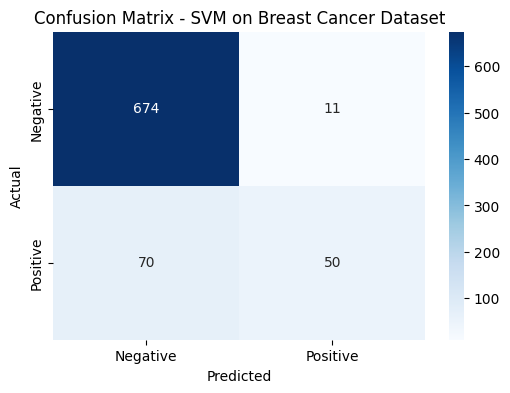

In [101]:
# Predictions
y_pred = svc.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["negative","positive"]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM on Breast Cancer Dataset")
plt.show()

In [103]:
## knn on iris
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [104]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [105]:
# Convert to DataFrame for readability
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = y

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [106]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for KNN distance calculations)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


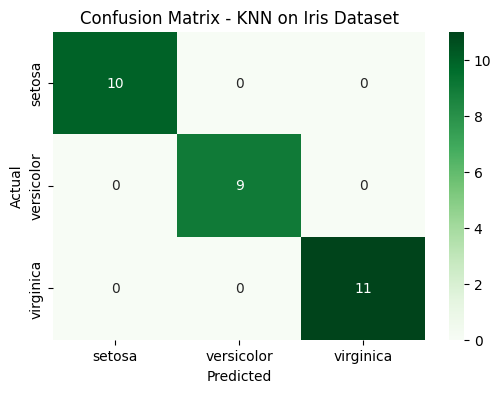

In [109]:
# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN on Iris Dataset")
plt.show()
